In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from torch.nn import Sequential
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report

In [2]:
train_set = datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 51140523.32it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1943550.85it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11725208.40it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1382376.37it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw


In [ ]:
print('Structure of train data:', train_set, '\n')
print('Structure of test data:', test_set, '\n')

Structure of train data: Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor() 

Structure of test data: Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor() 



In [ ]:
print('Image on index 0 shape:', train_set[0][0].shape)
print('Image on index 0 label:', test_set[0][1])

Image on index 0 shape: torch.Size([1, 28, 28])
Image on index 0 label: 7


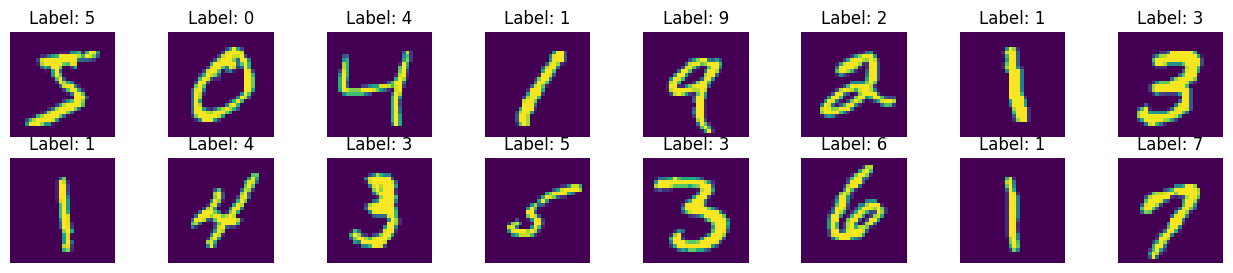

In [ ]:
plt.figure(figsize = (16, 3))
for k, (image, label) in enumerate(train_set):
    if k >= 16:
        break
    plt.subplot(2, 8, k+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title('Label: {}'.format(label))
    plt.axis('off')

In [ ]:
# Creating the Network:
class MNISTClassifier(nn.Module):            # nn.Module is a subclass from which we inherit
  def __init__(self):
      super().__init__()
      self.layers = Sequential(
          nn.Linear(28*28, 128),
          nn.ReLU(),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 10)
      )

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.layers(x)
    return x

In [ ]:
print('Initial image shape:', train_set[0][0].shape)
print('Subsequent image shape:',train_set[0][0].view(-1, 28*28).shape)

Initial image shape: torch.Size([1, 28, 28])
Subsequent image shape: torch.Size([1, 784])


In [3]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)
len(train_loader), len(test_loader)

(938, 157)

In [ ]:
60000/64, 10000/64

(937.5, 156.25)

In [ ]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [ ]:
y

tensor([4, 1, 3, 6, 9, 0, 7, 5, 7, 7, 1, 1, 0, 5, 8, 0, 0, 1, 3, 6, 1, 3, 9, 6,
        5, 0, 8, 7, 7, 6, 8, 4, 6, 3, 1, 6, 1, 2, 8, 4, 1, 7, 5, 4, 5, 9, 9, 9,
        9, 7, 9, 9, 7, 9, 2, 8, 4, 9, 5, 3, 1, 4, 6, 9])

In [15]:
x.shape

torch.Size([64, 1, 28, 28])

In [16]:
x.view(-1, 28*28).shape

torch.Size([64, 784])

In [ ]:
model = MNISTClassifier()
loss = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(8):
  for x, y in train_loader:
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
  print(f'Epoch {epoch+1}/8 -> los={loss_value.item():.4f}')

Epoch 1/8 -> los=0.2196
Epoch 2/8 -> los=0.1959
Epoch 3/8 -> los=0.0095
Epoch 4/8 -> los=0.0162
Epoch 5/8 -> los=0.0953
Epoch 6/8 -> los=0.0305
Epoch 7/8 -> los=0.0174
Epoch 8/8 -> los=0.0415


In [ ]:
x,y = next(iter(test_loader))
y_pred = model(x)
y_pred = torch.argmax(y_pred, dim=1)
y_pred

tensor([6, 3, 4, 7, 4, 4, 0, 4, 4, 8, 0, 9, 5, 7, 5, 3, 7, 4, 7, 8, 5, 0, 4, 5,
        2, 3, 9, 2, 3, 0, 2, 0, 3, 2, 6, 9, 5, 3, 7, 5, 5, 7, 5, 8, 5, 4, 6, 8,
        6, 8, 3, 9, 7, 0, 7, 7, 4, 5, 4, 7, 9, 0, 0, 9])

In [ ]:
y

tensor([6, 3, 4, 7, 4, 4, 0, 4, 4, 8, 0, 9, 5, 7, 5, 3, 7, 4, 7, 8, 5, 0, 4, 5,
        2, 3, 3, 2, 3, 0, 2, 0, 3, 2, 6, 9, 5, 3, 7, 5, 5, 7, 5, 8, 5, 4, 6, 8,
        6, 8, 3, 9, 7, 0, 7, 7, 4, 5, 4, 7, 9, 0, 0, 3])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



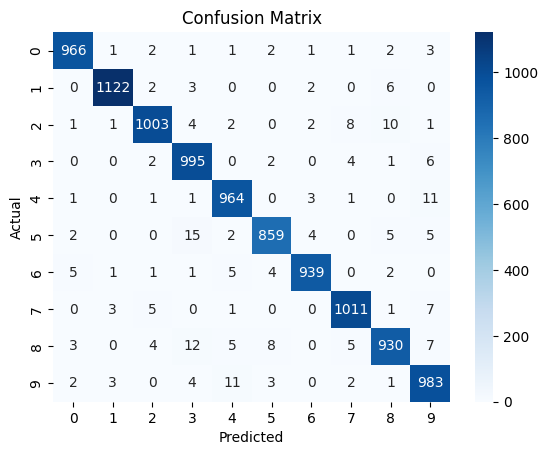

Accuracy Score: 0.9772


In [ ]:
# prompt: show confusion matrix and acuracy score

# Assuming you want to evaluate the model on the entire test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
  for x, y in test_loader:
    outputs = model(x)
    predicted = torch.argmax(outputs, dim=1)
    y_true.extend(y.numpy())
    y_pred.extend(predicted.numpy())

# Classification report
print(classification_report(y_true, y_pred))


# Confusion matrix
cm = conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score:", accuracy)